In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as pit
import pandas as pd
import seaborn as sns

In [3]:
dataset=pd.read_csv('D:\panda\Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Divide the dataset into dependent and independent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [5]:
y.shape

(10000,)

In [6]:
## Feature Engineering(One-hot encoding to handle the categorical features)

geography = pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [7]:
geography.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [8]:
gender.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [9]:
## Concatenate these features by dropping them from dataframe
X = X.drop(['Geography','Gender'], axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
X=pd.concat([X, geography, gender],axis=1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


## Splitting the datset into training and test set

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
X.shape

(10000, 11)

In [15]:
y.shape

(10000,)

## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [18]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [19]:
X_train.shape

(8000, 11)

In [20]:
X_test.shape

(2000, 11)

In [21]:
y_train.shape

(8000,)

In [22]:
y_test.shape

(2000,)

## Creating the ANN

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

### Intialize the ANN

In [24]:
classifier = Sequential()

### Adding the input layer

In [25]:
## 11 units means 11 features creating 11 nodes in input layer.
## 'relu' is the activation function which is going to be applied in next layer.
classifier.add(Dense(units=11,activation='relu'))

### Adding the first hidden layer

In [26]:
classifier.add(Dense(units=7,activation='relu'))

### Adding the second hidden layer

In [27]:
classifier.add(Dense(units=6,activation='relu'))

### Adding the output layer

In [28]:
classifier.add(Dense(1,activation='sigmoid'))

## Training the ANN model

In [29]:
## By default Adam use a learning rate of 0.01
classifier.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

## Early Stopping

In [31]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [32]:
## If we want to use a learning rate of your own
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
# Now,we can put this 'opt' in place of optimizer='opt'

In [33]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000


536/536 [==============================] - 4s 5ms/step - loss: 0.5189 - accuracy: 0.7962 - val_loss: 0.4617 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4342 - accuracy: 0.7962 - val_loss: 0.4272 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4070 - accuracy: 0.7962 - val_loss: 0.4124 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3895 - accuracy: 0.8222 - val_loss: 0.3959 - val_accuracy: 0.8360
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3774 - accuracy: 0.8468 - val_loss: 0.3878 - val_accuracy: 0.8383
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3687 - accuracy: 0.8576 - val_loss: 0.3826 - val_accuracy: 0.8444
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3625 - accuracy: 0.8591 - val_loss: 0.3810 - val_accurac

In [34]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

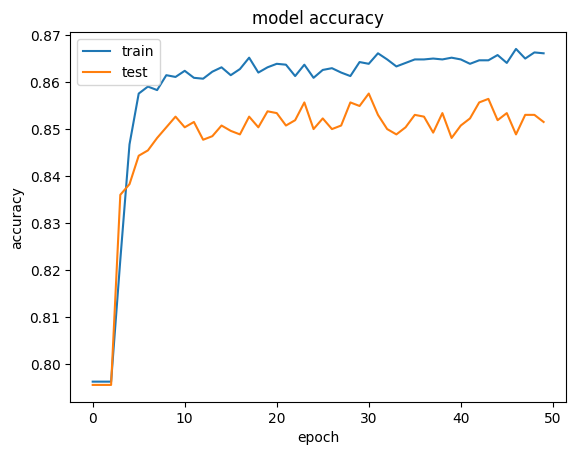

In [42]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

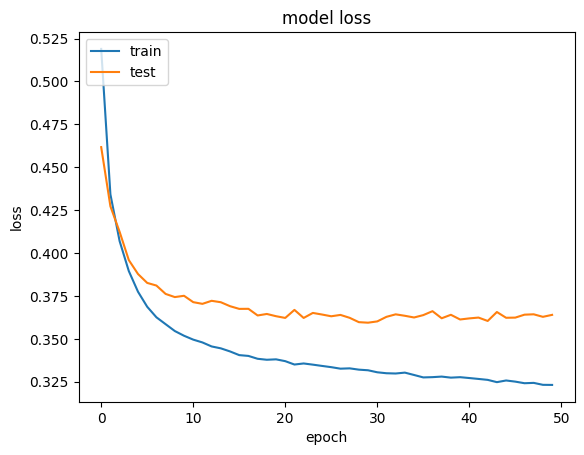

In [43]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

## Predicting the set test results

In [44]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 1s 5ms/step


### Plot the confusion matrix

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1507,   88],
       [ 188,  217]], dtype=int64)

### Calculate the accuracy

In [49]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.862

### Get the weights

In [50]:
classifier.get_weights()

[array([[ 0.07543501, -0.13905713, -0.02679219,  0.16501763, -0.00674826,
          0.20032495,  0.52493596, -0.09907679, -0.6239444 ,  0.25233287,
          0.32347962],
        [-0.7192317 ,  0.8757068 ,  0.30667266, -0.5783652 ,  0.60948664,
          0.11629864,  0.06108564,  0.19094308,  0.08290195, -0.3646881 ,
         -0.1492169 ],
        [-0.22411184, -0.10093265,  0.18034619,  0.3560583 ,  0.27732277,
         -0.03431602,  0.29305393, -0.00516632,  0.4189795 , -0.2881729 ,
          0.29523197],
        [ 0.08846938,  0.17873129, -0.26765573, -0.2134764 , -0.00226677,
          0.36670533, -0.58149725,  0.42439744, -0.2450316 ,  0.18096125,
         -0.44555917],
        [ 0.371882  , -0.724825  , -0.9456336 ,  0.5600552 , -0.16342854,
         -0.45283198,  0.3640288 ,  1.131195  , -0.14184818,  0.37553304,
         -0.36937654],
        [-0.19847848,  0.13722414, -0.14420013, -0.3161297 ,  0.09228928,
          0.18803248,  0.2040924 , -0.14657445, -0.02728985, -0.1496654